In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,multilabel_confusion_matrix
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score
from sklearn.metrics import roc_curve



import warnings 
warnings.filterwarnings('ignore')

In [48]:
data = pd.read_csv('iris.csv')



In [52]:
data.drop(data.columns[0], axis=1, inplace=True)

In [53]:
data['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
le = LabelEncoder()

In [56]:
data['Species'] = le.fit_transform(data['Species'])

In [57]:
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [58]:
x = data.drop('Species',axis=1)
y = data['Species']

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state =42,stratify = y)

In [60]:
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3
...,...,...,...,...
37,4.9,3.1,1.5,0.1
2,4.7,3.2,1.3,0.2
33,5.5,4.2,1.4,0.2
52,6.9,3.1,4.9,1.5


In [61]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [62]:
y_pred = lr.predict(x_test)
y_pred

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [63]:
y_test

38     0
127    2
57     1
93     1
42     0
56     1
22     0
20     0
147    2
84     1
107    2
141    2
104    2
51     1
7      0
49     0
14     0
69     1
63     1
138    2
10     0
140    2
58     1
134    2
132    2
77     1
75     1
18     0
116    2
28     0
Name: Species, dtype: int64

In [64]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([0, 1, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 2, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 2, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

In [65]:
y_train

8      0
106    2
76     1
9      0
89     1
      ..
37     0
2      0
33     0
52     1
3      0
Name: Species, Length: 120, dtype: int64

In [66]:
y_pred = lr.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score:",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
********************************************************************************
Accuracy Score: 0.9666666666666667
********************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [67]:
y_pred_train = lr.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[40  0  0]
 [ 0 38  2]
 [ 0  1 39]]
********************************************************************************
Accuracy Score: 0.975
********************************************************************************
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        40
           2       0.95      0.97      0.96        40

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



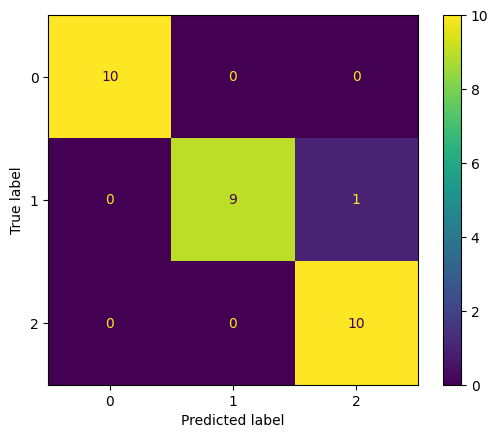

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

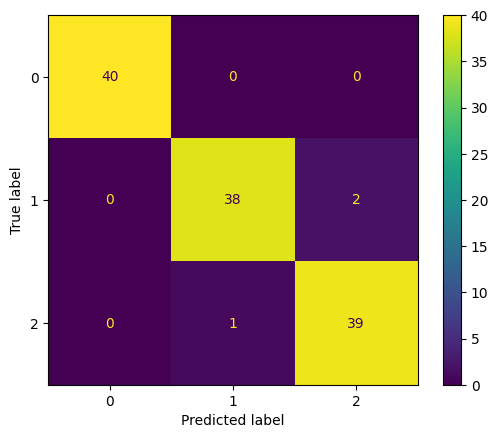

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

In [70]:
import pickle 
with open("model.pkl",'wb') as f:
    pickle.dump(lr,f)

In [71]:
data = { 'columns' : list(x.columns)}

In [36]:
with open("data.json",'wb') as j:
    pickle.dump(data,j)